In [11]:
import numpy as np
import pandas as pd
import

# $\Sigma$

In [1]:
# this is what the real first cov matrix looks like from R
# cov_mats[1:5,1:5,1]
#               AAPL           ACN           AMG           AMT          ANTM
# AAPL  8.754898e-05 -1.139086e-05 -1.192942e-06 -1.746261e-06  6.700847e-06
# ACN  -1.139086e-05  5.723274e-05  1.643228e-06  8.624553e-06  9.799957e-07
# AMG  -1.192942e-06  1.643228e-06  1.206017e-04  6.715948e-06 -9.447320e-06
# AMT  -1.746261e-06  8.624553e-06  6.715948e-06  8.823275e-05 -3.082557e-06
# ANTM  6.700847e-06  9.799957e-07 -9.447320e-06 -3.082557e-06  1.224090e-04

In [4]:
# load data created from 

# if using csv
# covMats = pd.read_csv('data/mgarch_sim_3000_cov100.csv')

# if using npy
covMats = np.load("data/mgarch_sim_3000_cov100.npy")

# shape
covMats.shape

FileNotFoundError: [Errno 2] No such file or directory: 'data/mgarch_sim_3000_cov100.npy'

In [ ]:
# reshape
covM = np.reshape(covMats,(3000,100,100))

In [ ]:
# sanity check
# ensure we are working with symmetric matrices

def check_symmetric(a, rtol=1e-05, atol=1e-08):
    return np.allclose(a, a.T, rtol=rtol, atol=atol)
for i in range(covM.shape[0]):
    if check_symmetric(covM[0,:,:]) == False:
        print(i)

In [ ]:
# dimensions
n = 100

# lists
var55 = []
var95 = []
condNum = []

for i in range(covM.shape[0]):
    # sigma[i]
    mat = covM[i,:,:]
    
    # condition number
    c = LA.cond(mat)
    condNum.append(c)
    
    # perform svd decomp
    model = PCA(n_components=n)
    model.fit_transform(mat)
    
    # explained variance vector - cumulative
    v = model.explained_variance_ratio_.cumsum()
    idx55 = np.where(v>=.55)
    idx95 = np.where(v>=.95)
    
    # extract number of eigenvalues needed, 0 indexed 
    x = idx55[0][0] + 1
    y = idx95[0][0] + 1
    
    # append to list
    var55.append(x)
    var95.append(y)

In [ ]:
# dates
dates = pd.date_range('2019-10-05', periods=num_days)

arr = np.zeros((covM.shape[0],3))
arr[:,0] = var55
arr[:,1] = var95
arr[:,2] = condNum

df = pd.DataFrame(arr)
df.index = df_plot.index
col_string = 'number of eigenvalues needed to explain '
df.columns = [col_string + '55% variance',col_string + '95% variance','condition number']

# num dates to plot to ease visualization
length = 500

if False:
    for i in range(df.shape[1]):
        plt.figure(i,figsize=(20,10))
        plt.plot(dates[:length],df.iloc[:length,i])
        plt.xticks(df.iloc[:length,i].index[::50], rotation=30)
        plt.title(df.columns[i])
        plt.savefig('{}.png'.format(df.columns[i]))
        plt.show()


# $Z$

In [15]:
path = 'data/sim_csv_correctForm.csv'
dfz_ = pd.read_csv(path)

/Users/zachariemartin/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


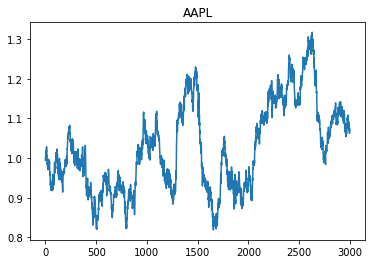

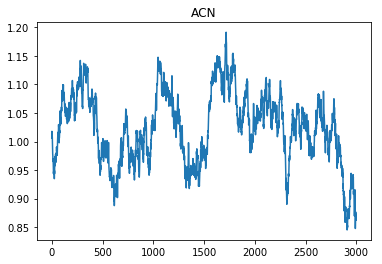

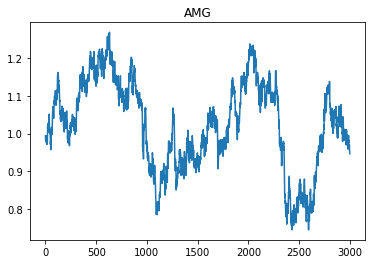

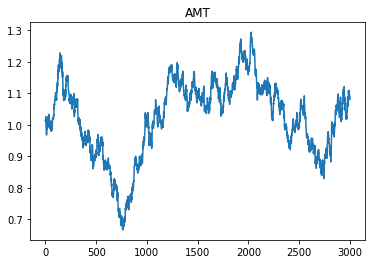

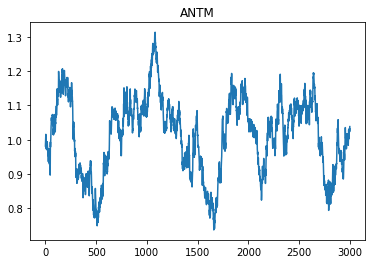

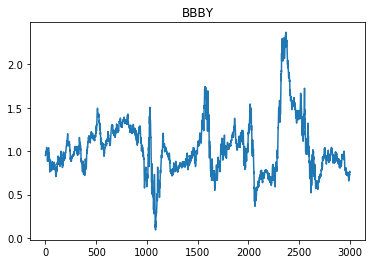

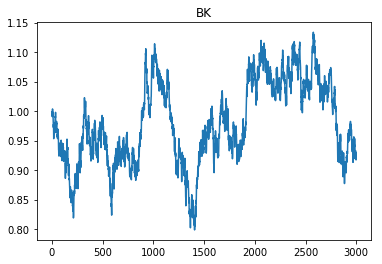

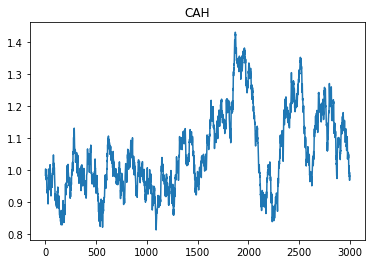

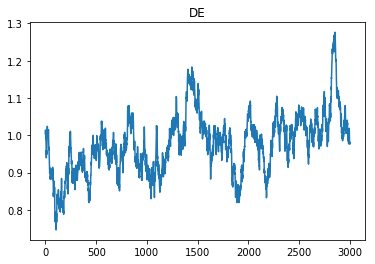

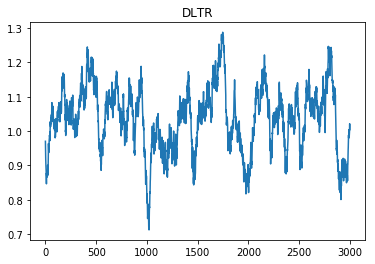

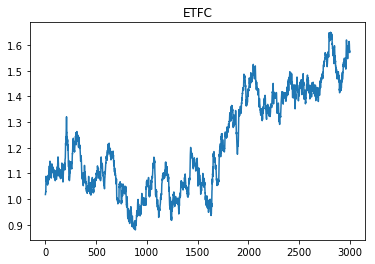

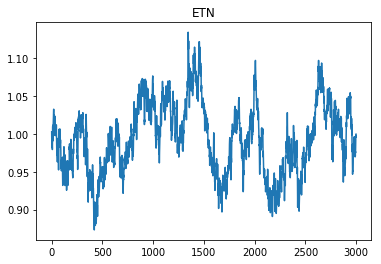

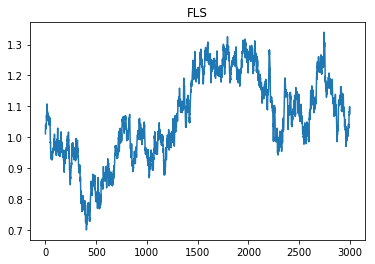

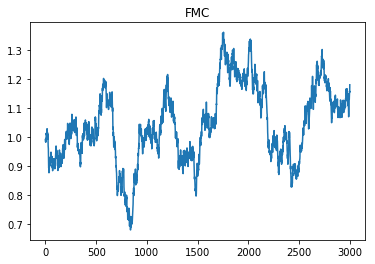

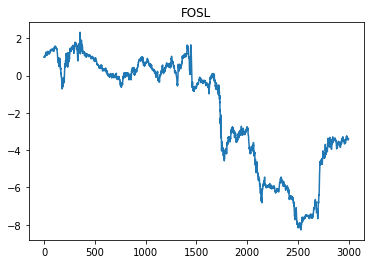

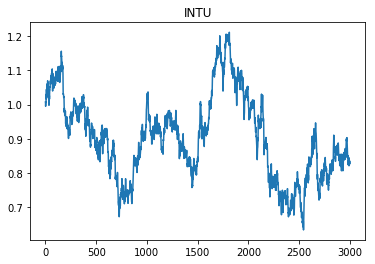

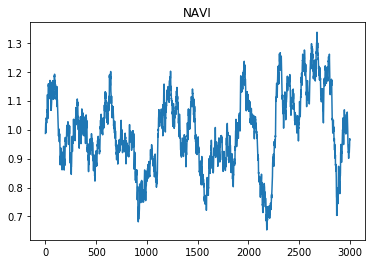

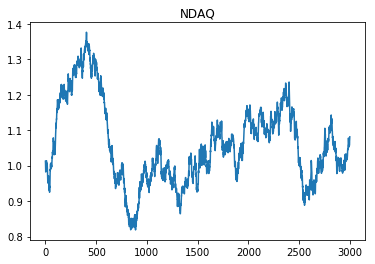

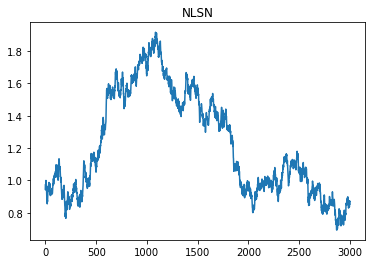

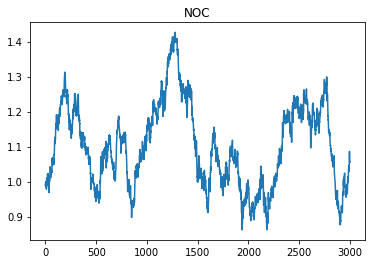

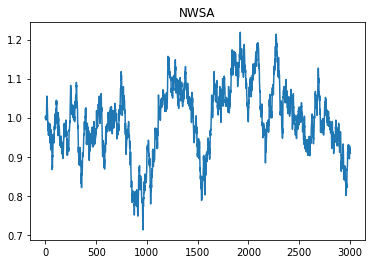

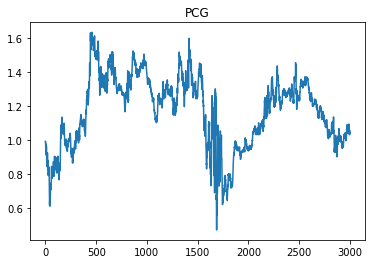

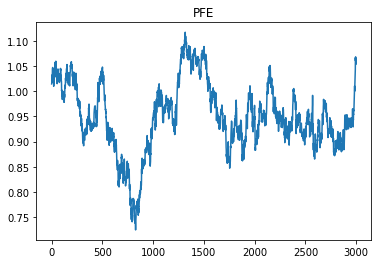

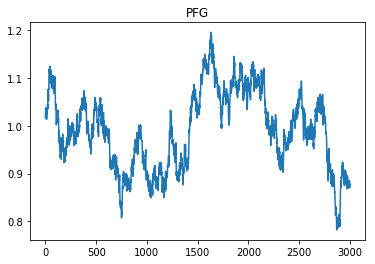

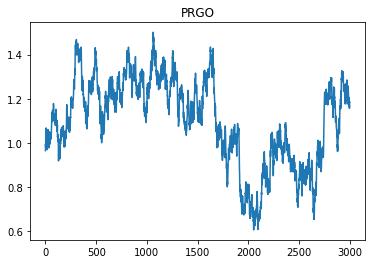

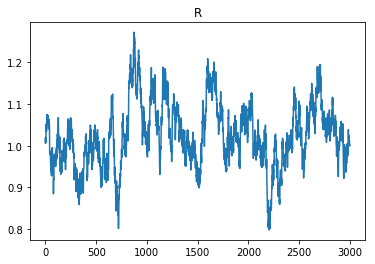

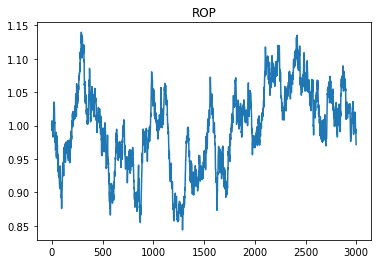

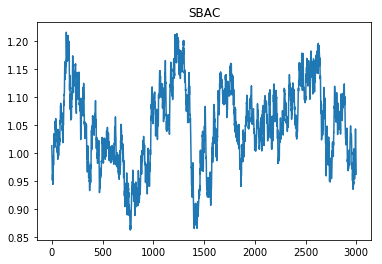

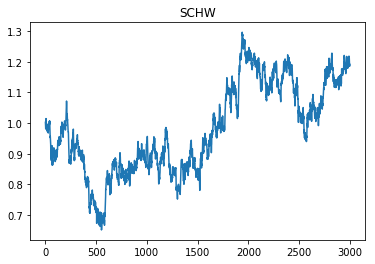

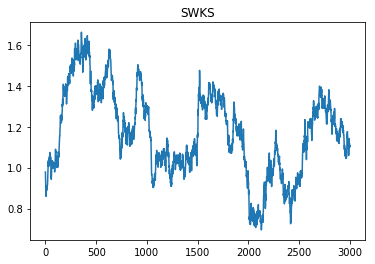

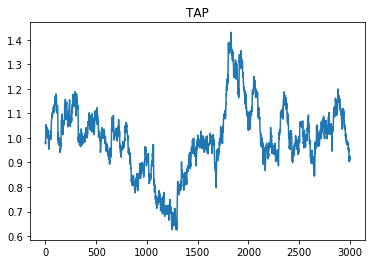

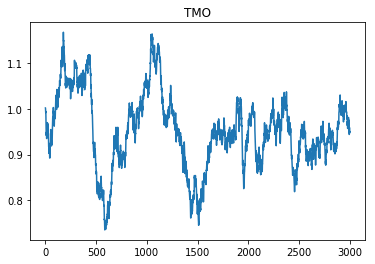

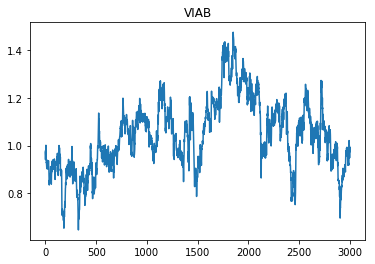

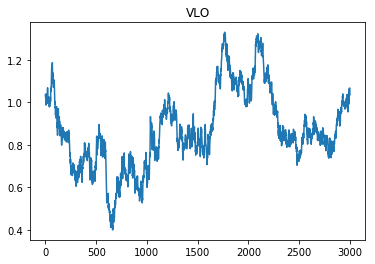

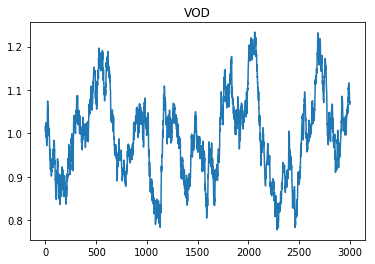

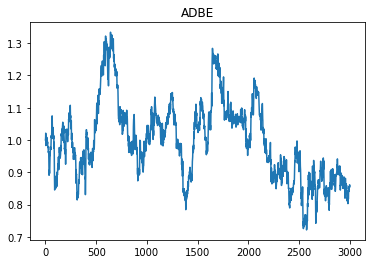

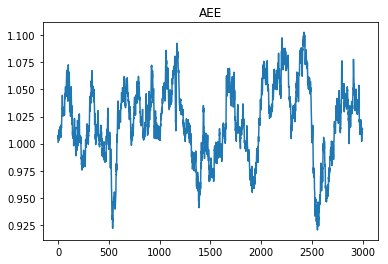

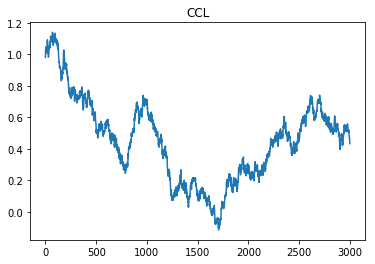

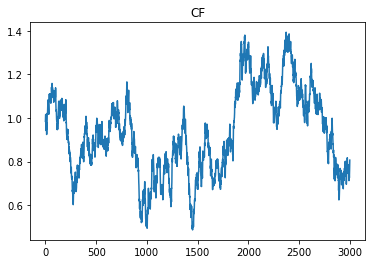

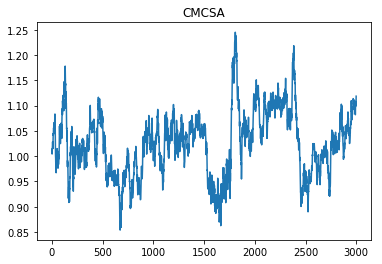

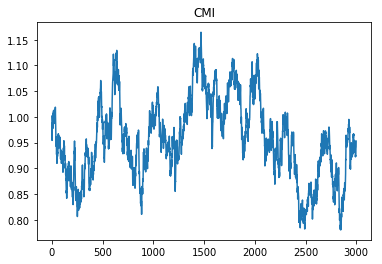

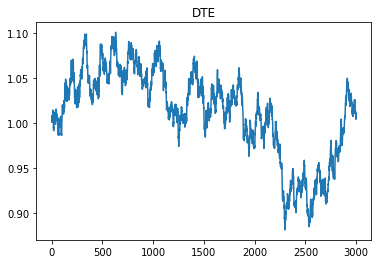

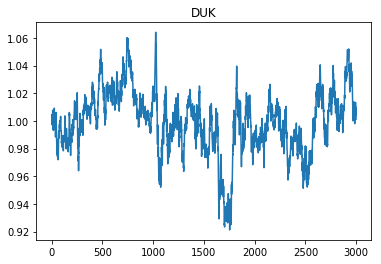

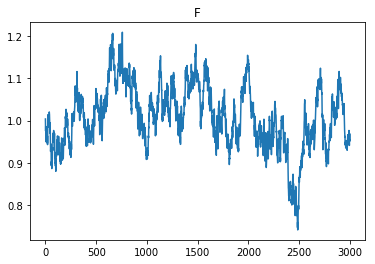

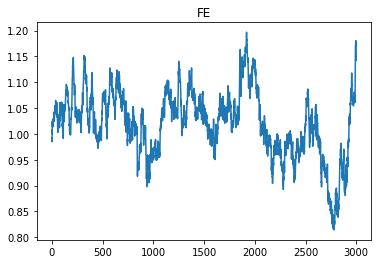

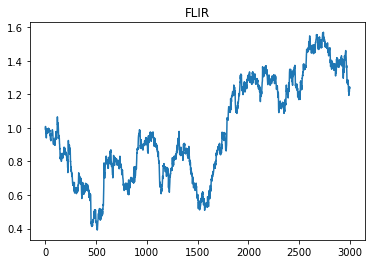

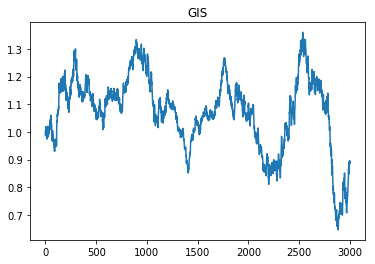

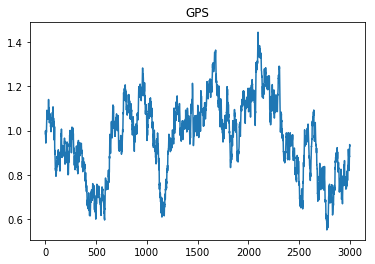

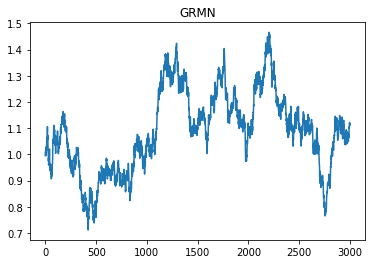

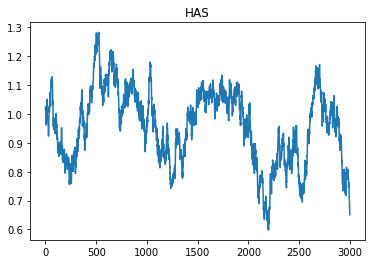

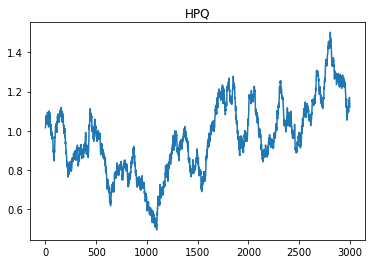

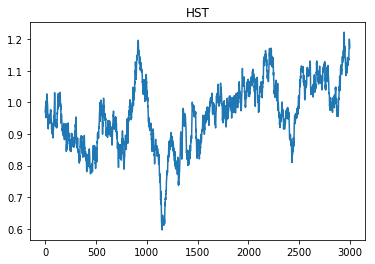

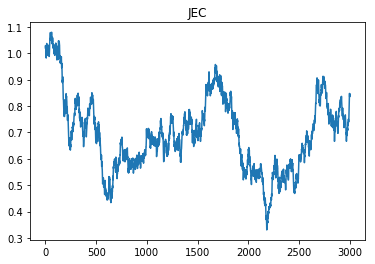

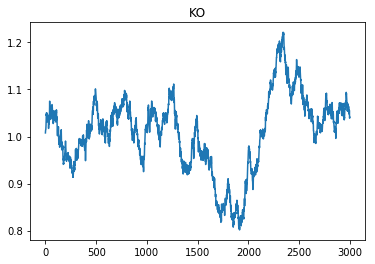

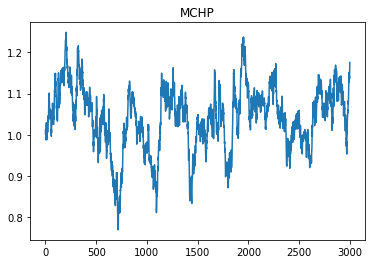

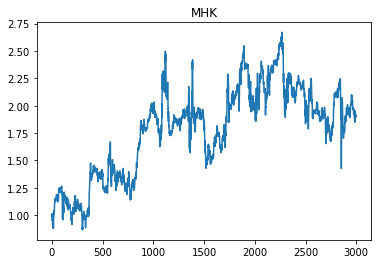

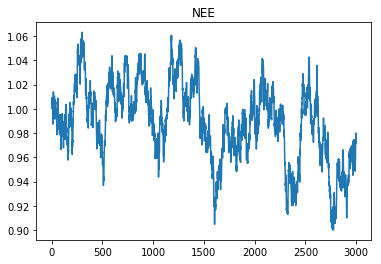

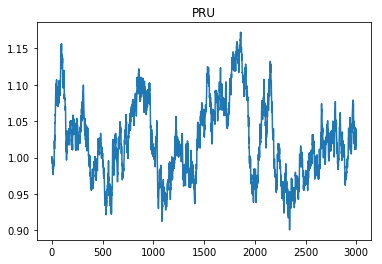

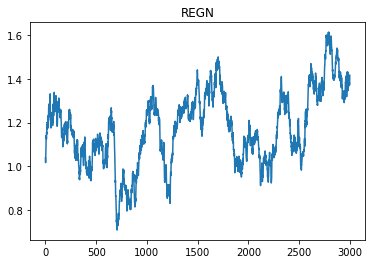

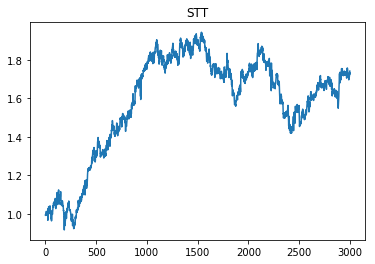

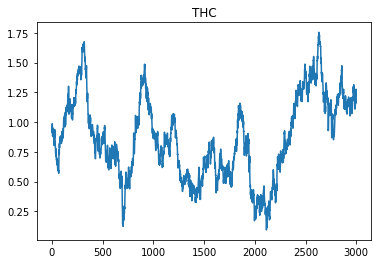

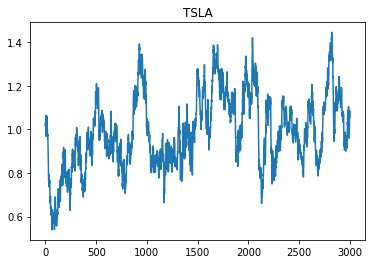

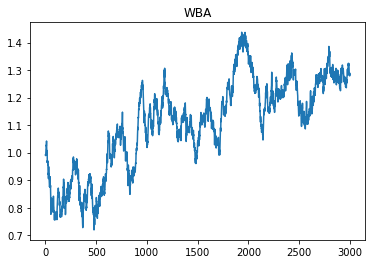

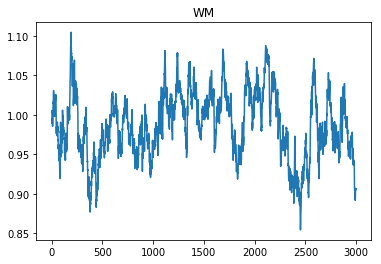

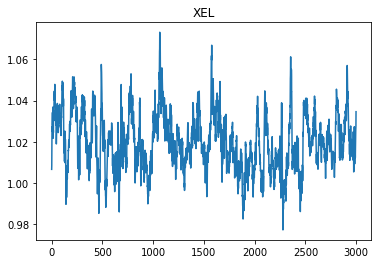

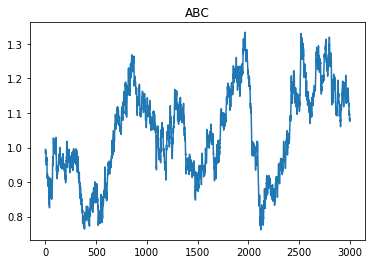

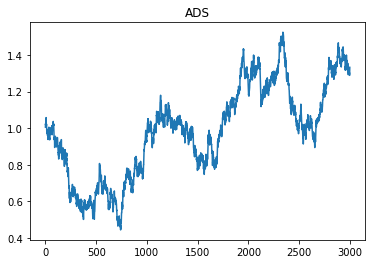

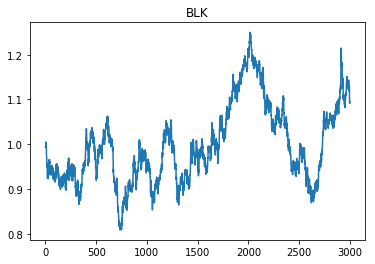

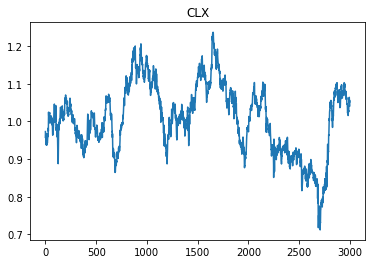

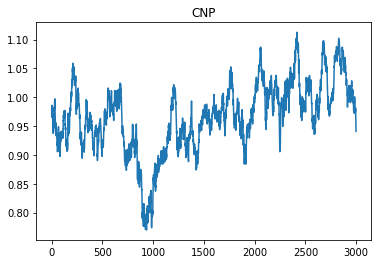

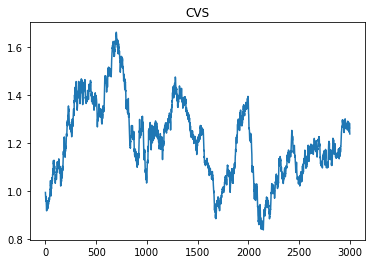

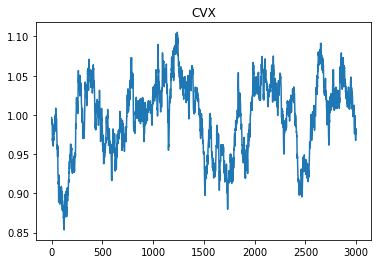

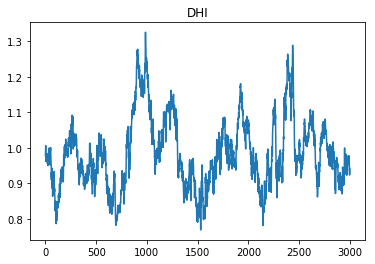

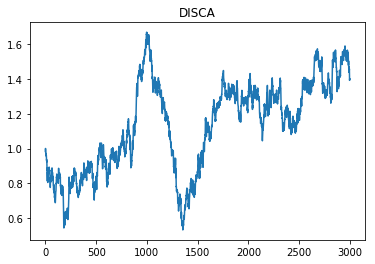

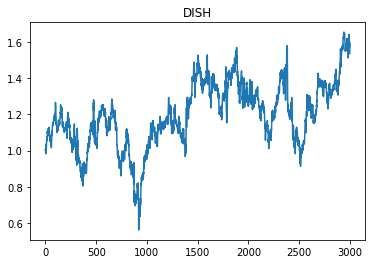

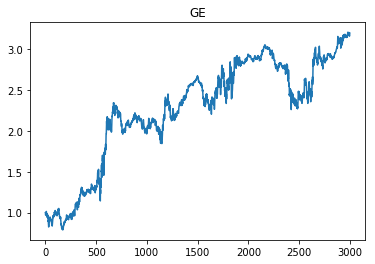

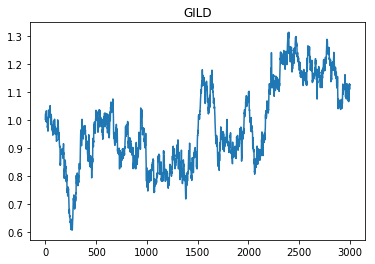

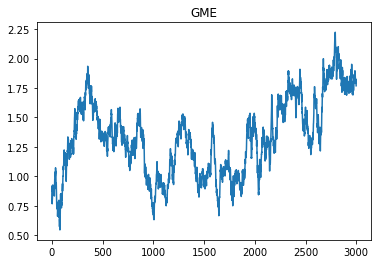

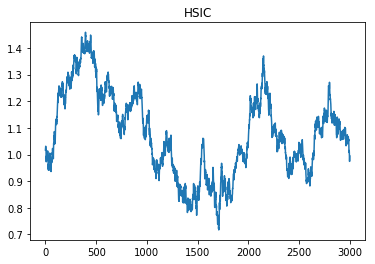

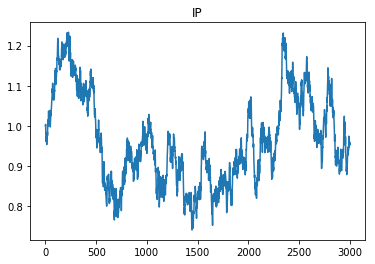

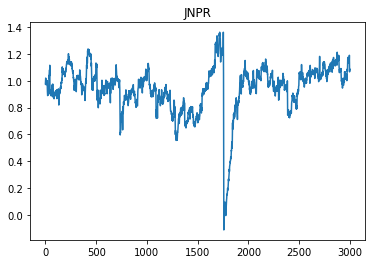

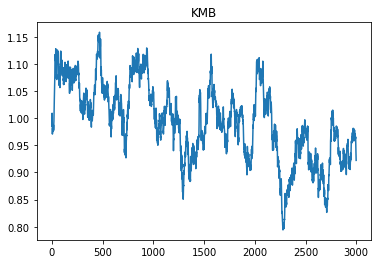

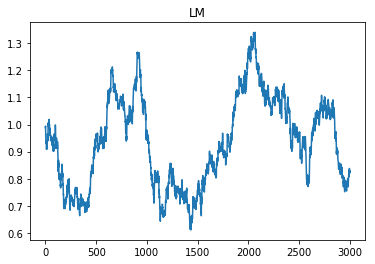

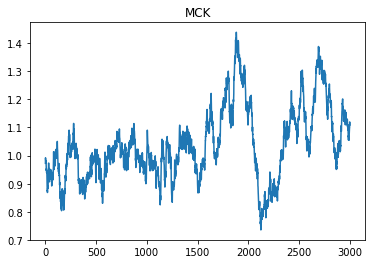

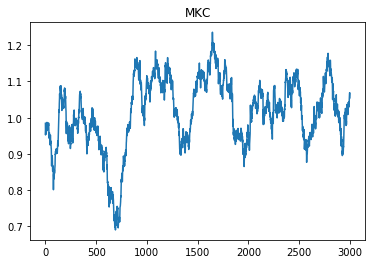

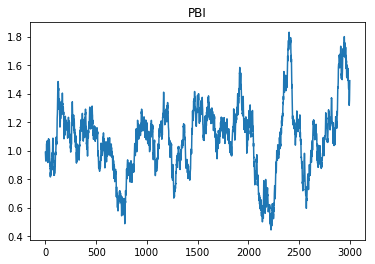

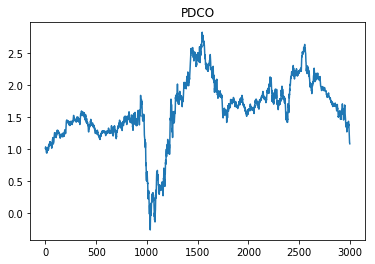

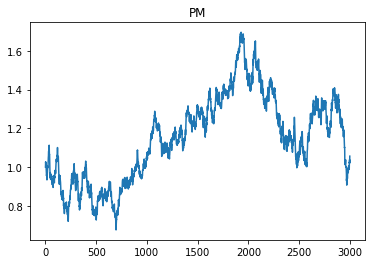

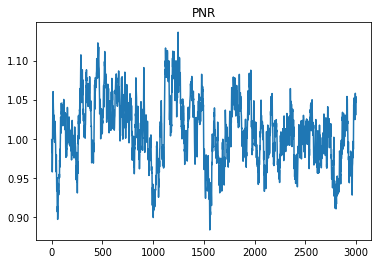

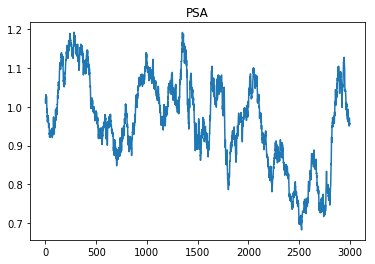

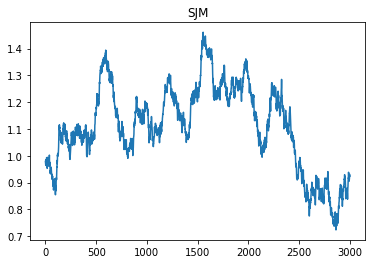

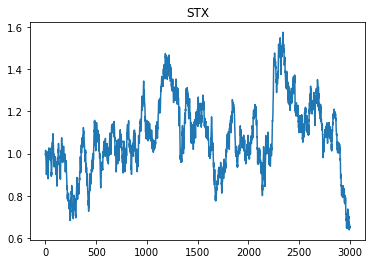

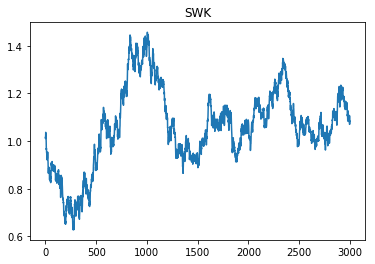

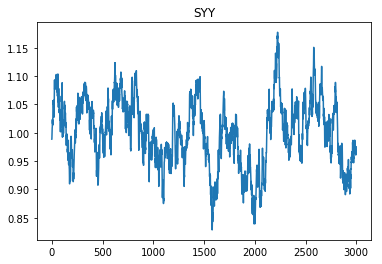

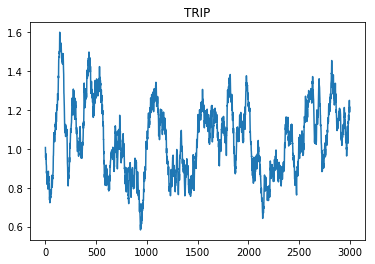

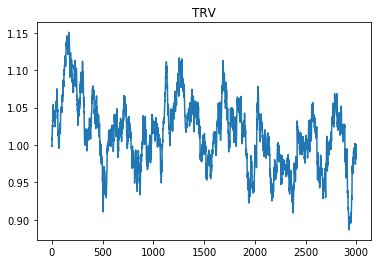

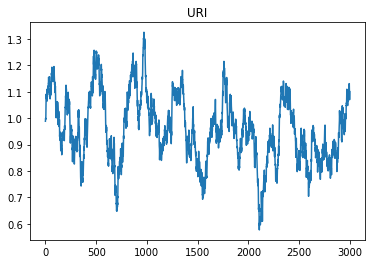

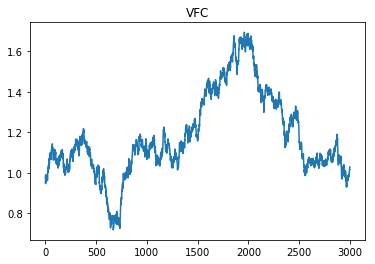

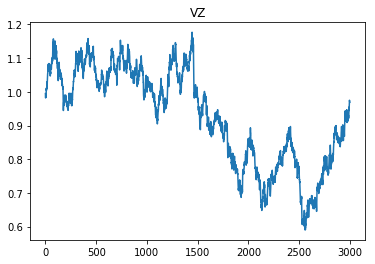

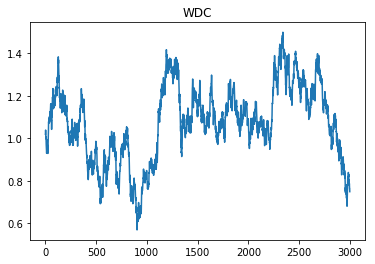

In [18]:
len_sim = 3000
num_assets = 100
target_stocks = dfz_['Name'].unique()
x = np.arange(len_sim)

# plot "returns" to see if they make sense   
if True:
    for i in range(num_assets):
        plt.figure(i)
        x = len(dfz_.loc[i*len_sim:(i+1)*len_sim-1,'Close'])
        x_len = np.arange(x)
        plt.plot(x_len,dfz_.loc[i*len_sim:(i+1)*len_sim-1,'Close'])
        plt.title(target_stocks[i])